<a href="https://colab.research.google.com/github/afraa-n/XAI-Interpretable-ML/blob/main/Interpretable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Exploratory Data Analysis (EDA)

### 1.1 Load data and Display


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
url = "/content/telco_cust_churn.csv"
churn_df = pd.read_csv(url)

# Display first few rows
print("\nFirst Five Rows:")
print(churn_df.head())


First Five Rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies   

### 1.2 Data Preprocessing

The dataset consists of 7,043 observations with `Churn` as the dependent variable. We begin by dropping the `customerID` column, as it is not relevant to our analysis.

Next, we adjust the data types of certain columns: `SeniorCitizen` is a binary feature and should be treated as categorical rather than numerical. The `TotalCharges` column, initially stored as an object, is updated by replacing any empty spaces with NaN and then converting it to a `float64` type.

After these adjustments, we drop any rows with missing values. We then check for any remaining missing values to ensure our dataset is clean.

In [2]:
# Check the types and shape of the data
print(churn_df.info())
print(churn_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Drop column customerID irrelevant for the analysis
churn_df.drop('customerID', axis=1, inplace=True)

# Convert 'SeniorCitizen' to categorical and 'TotalCharges' to float64
# 'SeniorCitizen' is a binary feature and should be treated as categorical
# 'TotalCharges' is currently an object; replace spaces with NaN and convert to float64
churn_df['SeniorCitizen'] = churn_df['SeniorCitizen'].astype('category')
churn_df['TotalCharges'] = churn_df['TotalCharges'].replace(" ", np.nan).astype('float64')
churn_df.dropna(inplace=True)

# Check for missing values
print("Missing value counts: ", churn_df.isnull().sum())

Missing value counts:  gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
# Convert columns to categorical where appropriate
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod', 'Churn']

# Ensure these columns are treated as categorical
churn_df[categorical_columns] = churn_df[categorical_columns].astype('category')

### 1.3 Analysis of Variables

**Distribution of `Churn` (Independent Variable)**  
To begin with, we'll visualize how the `Churn` variable is distributed. This tells us whether more customers are leaving or staying, which is important for understanding the overall churn distribution.

<ipython-input-5-bc195979d9f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=churn_df, palette='Accent')


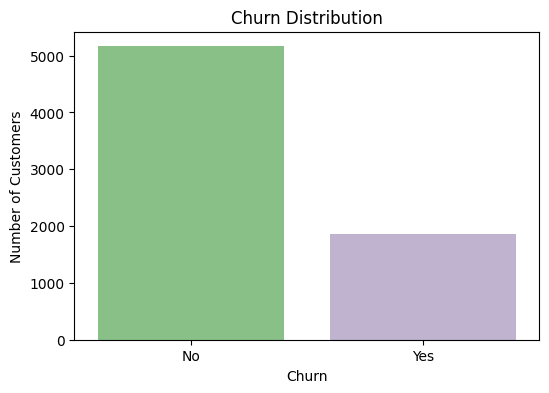

In [5]:
# Visualize the distribution of the 'Churn' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=churn_df, palette='Accent')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.title('Churn Distribution')
plt.show()

**Examining Numerical Variables**  
We'll next look at how numerical variables like tenure, MonthlyCharges, and TotalCharges are distributed. This will help us understand their distribution to see if they are normally distributed.

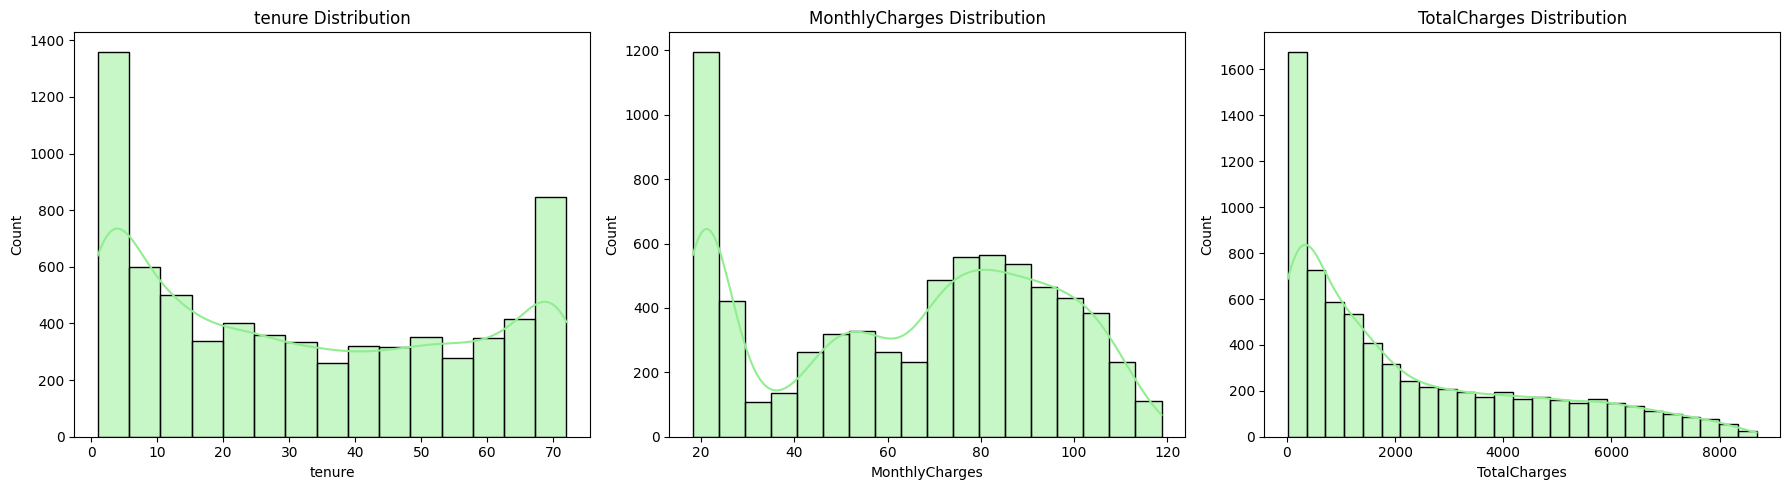

In [6]:
# Plot the distribution of numerical features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(18, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(churn_df[col], kde=True, color='lightgreen')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Checking Correlations**  
To see how strongly the numerical features are related to each other, we'll use a correlation heatmap. This helps in identifying if any features are too similar, which could violate the assumptions for our models.

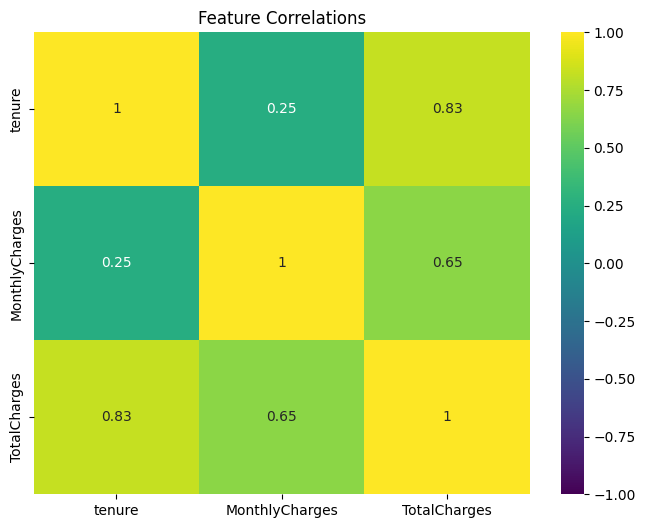

In [7]:
# Heatmap showing correlations between numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(churn_df[num_cols].corr(), annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Feature Correlations')
plt.show()

**Numerical Features vs. Churn**  
We’ll also visualize how numerical features differ between customers who churned and those who didn’t. This can reveal any significant differences in spending or account duration between the two groups.

<ipython-input-8-a670c52da172>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_df, palette='Accent')
<ipython-input-8-a670c52da172>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_df, palette='Accent')
<ipython-input-8-a670c52da172>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=churn_df, palette='Accent')


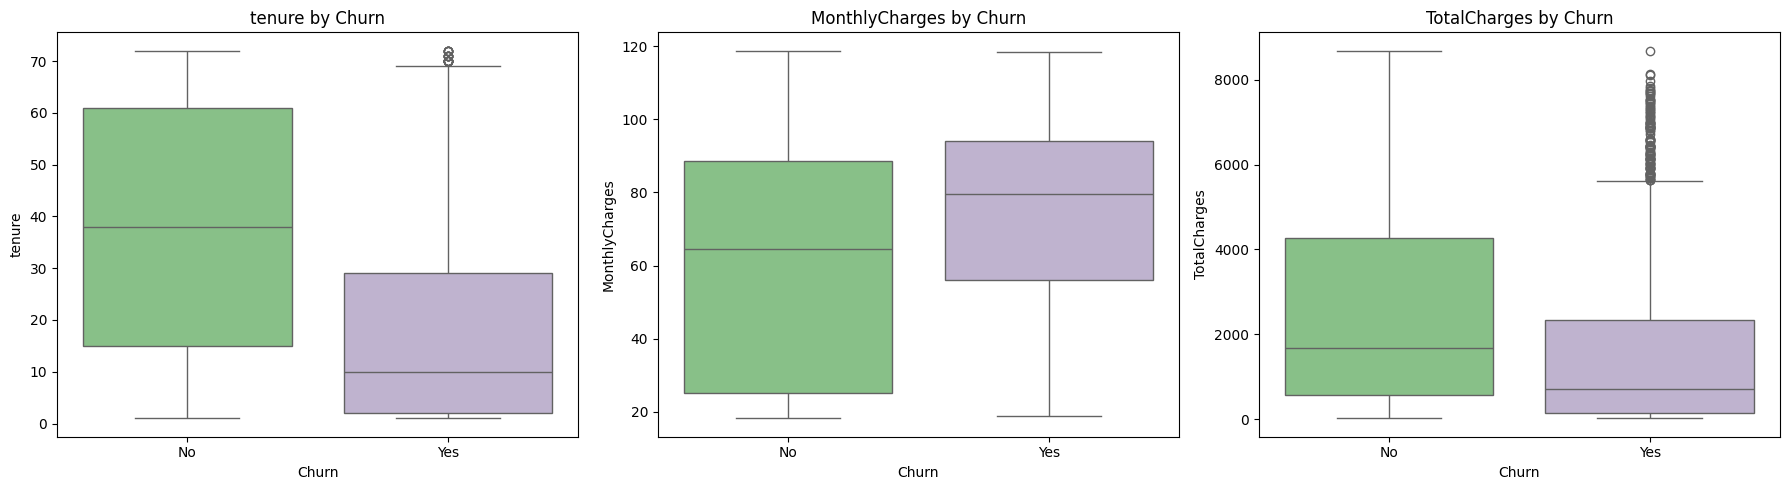

In [8]:
# Compare numerical features using boxplots by Churn status
plt.figure(figsize=(18, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn', y=col, data=churn_df, palette='Accent')
    plt.title(f'{col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

<ipython-input-9-3681d0c5e1cc>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=var, y='Churn', data=churn_df, palette="Accent")
<ipython-input-9-3681d0c5e1cc>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=var, y='Churn', data=churn_df, palette="Accent")
<ipython-input-9-3681d0c5e1cc>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=var, y='Churn', data=churn_df, palette="Accent")


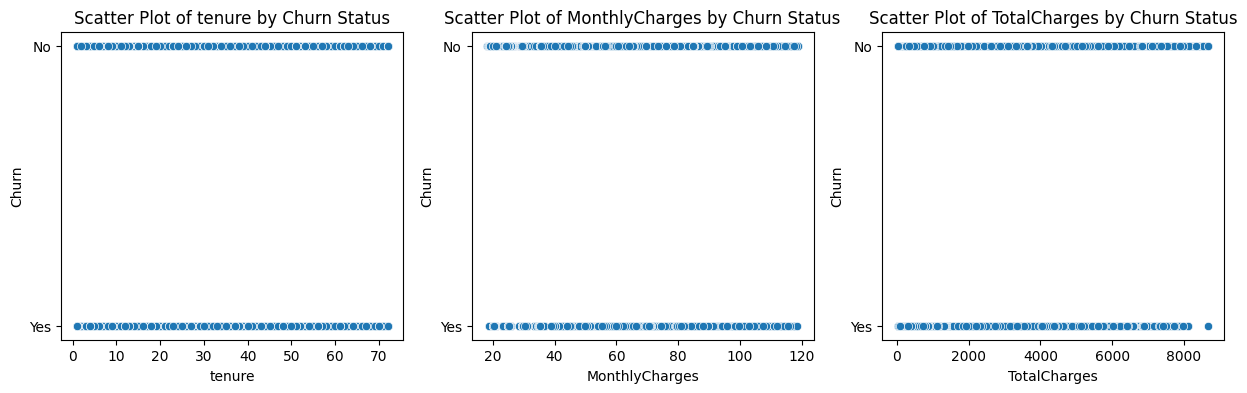

In [9]:
# Compare numerical features using scatterplots by Churn status
plt.figure(figsize=(15, 4))
for i, var in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=var, y='Churn', data=churn_df, palette="Accent")
    plt.title(f"Scatter Plot of {var} by Churn Status")
    plt.xlabel(var)
    plt.ylabel("Churn")

**Exploring Categorical Variables**  
Finally, we’ll analyze how categorical features are distributed across churn categories. This will help us see if certain categories are more likely to churn than others.

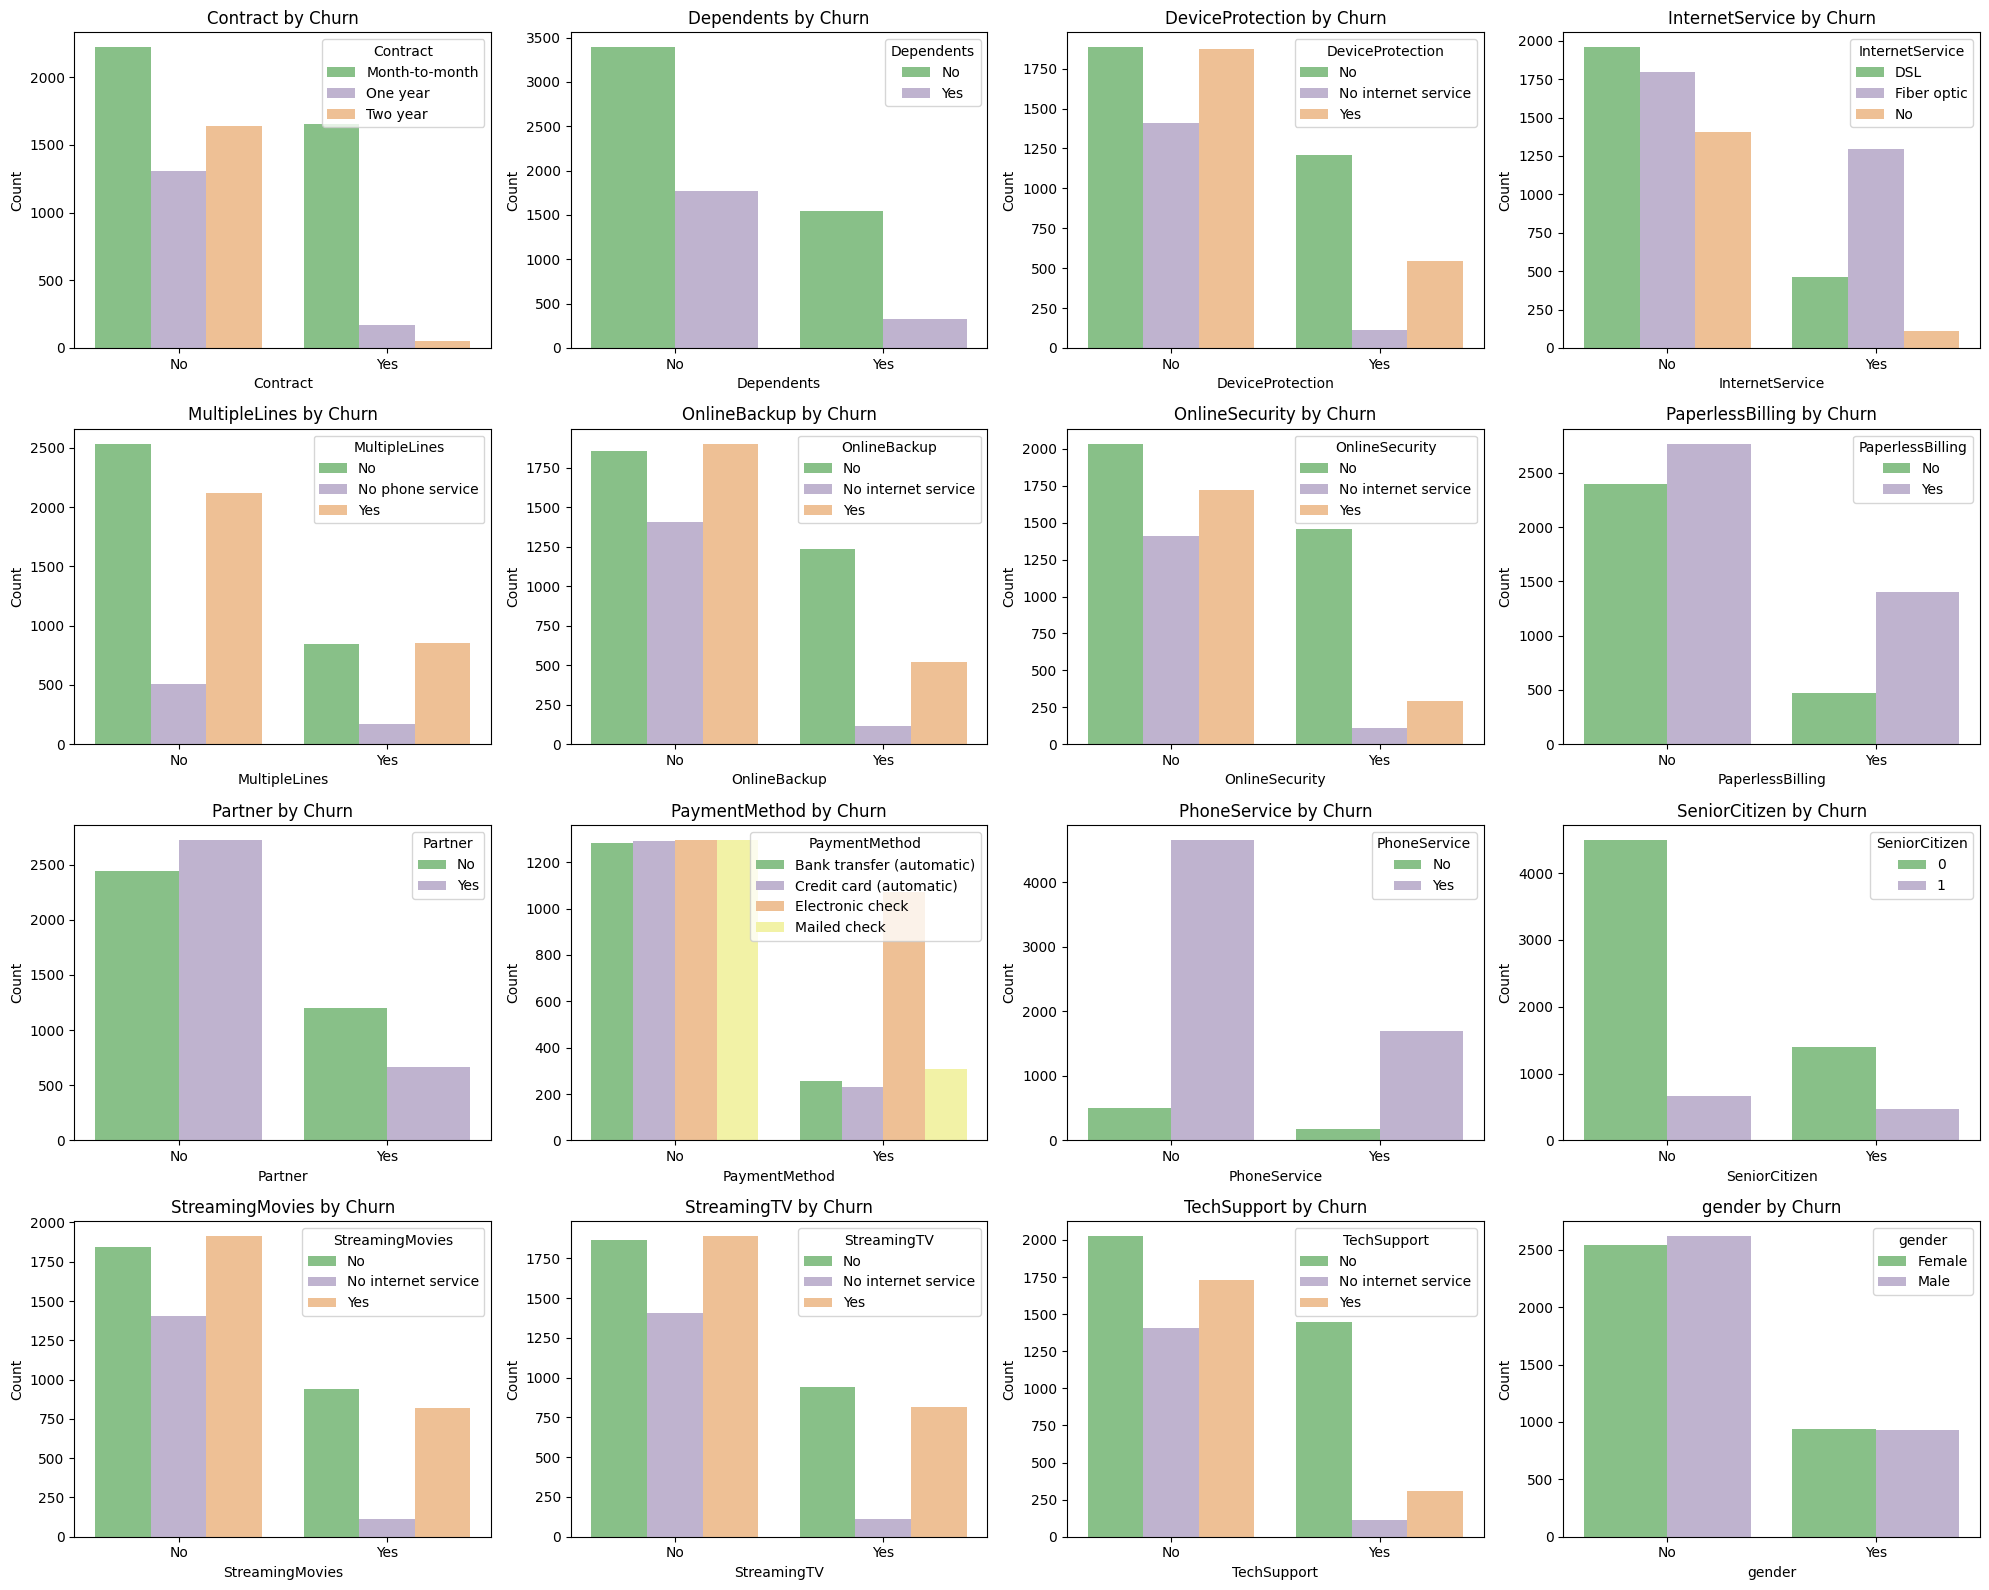

In [10]:
# Distribution of categorical features with respect to Churn
cat_cols = churn_df.select_dtypes(include=['category']).columns.difference(['Churn'])

# Create a 4x4 grid for plotting
plt.figure(figsize=(20, 16))
for i, col in enumerate(cat_cols):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x='Churn', hue=col, data=churn_df, palette='Accent')
    plt.title(f'{col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### 1.4 Evaluation of Assumptions

### 1.4.1 Linear Regression Assumptions

- **Linearity**: The scatter plots show nearly perfect straight lines for the Churn "Yes" and "No" categories. This suggests a clear linear relationship, although minor deviations could still affect the linearity assumption.

- **Independence**: Dataset is cross-sectional so each observation is assumed to be independent of the others.

- **Normality**: Histograms suggest that they are not perfectly normally distributed. This means that the normality assumption for linear regression might not be fully met.

- **No Multicollinearity**: The correlation heatmap shows strong correlations between `tenure` and `TotalCharges` (0.83), and between `MonthlyCharges` and `TotalCharges` (0.65). This indicates potential multicollinearity, which could impact the stability of regression coefficients.

- **No Autocorrelation**: Autocorrelation is not a concern here because the data is cross-sectional.

- **No Endogeneity**: The model seems to include relevant predictors and there’s no indications that the predictors are not correlated with the error term.

### 1.4.2 Logistic Regression Assumptions

1. **Linearity**: The scatter plots between the numeric variables and the `Churn` target show nearly straight horizontal lines for each class of `Churn`. This indicates that the numeric variables might be good predictors for `Churn`.

2. **No Multicollinearity**: The correlation heatmap showed strong correlations between `tenure` and `TotalCharges` (0.83) and between `MonthlyCharges` and `TotalCharges` (0.65). This suggests that there may be multicollinearity issues, which could affect the stability of the logistic regression coefficients.

3. **Independence of Observations**: Dataset is cross-sectional so each observation is assumed to be independent of the others.

4. **No Influential Outliers**: Box plots showed some outliers in `TotalCharges`, so these might need attention before fitting the model.

5. **Absence of Perfect Separation**: There seems to be predictors that perfectly separate the classes of `Churn`, which can cause issues in logistic regression.

6. **Large Sample Size**: With 7,043 observations, the sample size is sufficient for logistic regression.

### 1.4.3 Generalized Additive Models (GAMs) Assumptions

1. **Independence of Observations**: As stated above, the data is cross-sectional, so the observations are assumed to be independent.

2. **No Multicollinearity Among Predictors**: The correlation heatmap suggests high correlations among some predictors. This could be problematic for GAMs.

3. **Large Enough Sample Size**: With 7,043 observations, there is a large enough sample size for GAMs.

---

## 2. Model Building

### 2.1 Data Preparation and Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# Encode the target variable
label_encoder = LabelEncoder()
churn_df['Churn'] = label_encoder.fit_transform(churn_df['Churn'])

# Separate features and target variable
X = churn_df.drop(columns=['Churn'])
y = churn_df['Churn']

# Separate numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

# Define the preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),  # Standardize numerical features
        ('cat', OneHotEncoder(drop='first'), cat_cols)  # One-Hot Encode categorical features
    ]
)

# Create a pipeline with preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the features
X_processed = pipeline.fit_transform(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

### 2.2 Linear Regression

Linear Regression Metrics:
Train MSE: 0.1383
Test MSE: 0.1459
Train R²: 0.2913
Test R²: 0.2522
Train Accuracy: 0.8030
Test Accuracy: 0.7918

Linear Regression Coefficients:
                                       Coefficient
tenure                                   -0.046361
MonthlyCharges                           -0.110551
TotalCharges                             -0.103067
gender_Male                              -0.003691
SeniorCitizen_1                           0.054641
Partner_Yes                               0.007048
Dependents_Yes                           -0.028448
PhoneService_Yes                          0.021362
MultipleLines_No phone service           -0.021362
MultipleLines_Yes                         0.068537
InternetService_Fiber optic               0.273538
InternetService_No                       -0.033342
OnlineSecurity_No internet service       -0.033342
OnlineSecurity_Yes                       -0.037186
OnlineBackup_No internet service         -0.033342
OnlineBacku

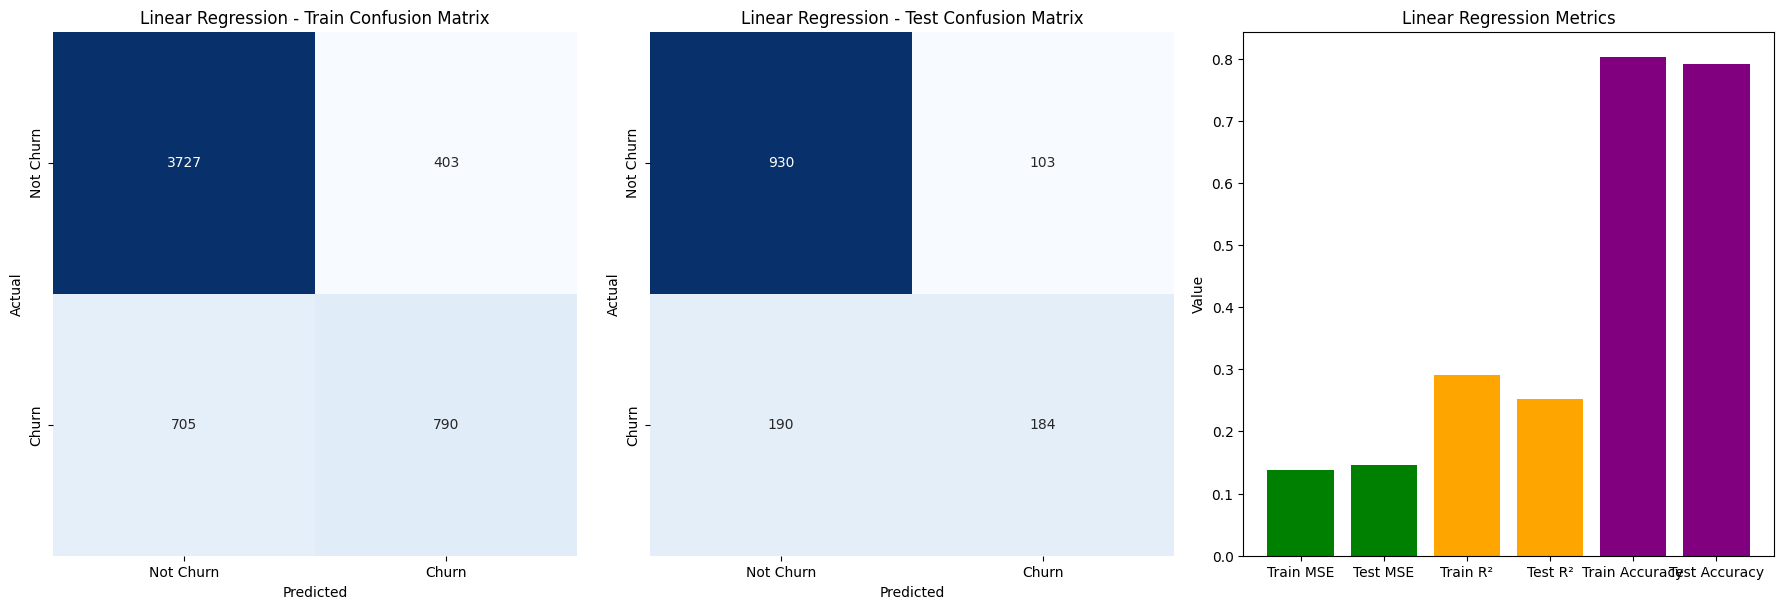

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Convert continuous predictions to binary
y_pred_train_binary = (y_pred_train > 0.5).astype(int)
y_pred_test_binary = (y_pred_test > 0.5).astype(int)

# Confusion matrices
conf_matrix_train_linear = confusion_matrix(y_train, y_pred_train_binary)
conf_matrix_test_linear = confusion_matrix(y_test, y_pred_test_binary)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train_binary)
test_accuracy = accuracy_score(y_test, y_pred_test_binary)

# Print metrics
print(f"Linear Regression Metrics:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Extract coefficients and feature names
# Get feature names from the preprocessor
feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
feature_names = list(num_cols) + list(feature_names)

# Combine coefficients with feature names
coef_df = pd.DataFrame(linear_model.coef_, index=feature_names, columns=['Coefficient'])
print("\nLinear Regression Coefficients:")
print(coef_df)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion Matrix - Train
sns.heatmap(conf_matrix_train_linear, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            cbar=False, square=True, xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Linear Regression - Train Confusion Matrix')

# Confusion Matrix - Test
sns.heatmap(conf_matrix_test_linear, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            cbar=False, square=True, xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Linear Regression - Test Confusion Matrix')

# Metrics
axes[2].bar(['Train MSE', 'Test MSE', 'Train R²', 'Test R²', 'Train Accuracy', 'Test Accuracy'],
             [train_mse, test_mse, train_r2, test_r2, train_accuracy, test_accuracy],
             color=['green', 'green', 'orange', 'orange','purple', 'purple'])
axes[2].set_title('Linear Regression Metrics')
axes[2].set_ylabel('Value')

plt.tight_layout()
plt.show()


**Interpretation**  

The linear regression model achieved a Mean Squared Error (MSE) of 0.1383 on the training set and 0.1459 on the test set, with R² values of 0.2913 and 0.2522, respectively. These metrics suggest that the model explains a modest portion of the variance in churn predictions, with a slight decline in performance on the test set implyong that there is some overfitting. The coefficients indicate that features such as `tenure`, `MonthlyCharges`, and `TotalCharges` have negative relationships with churn probability, while `InternetService_Fiber optic` has a positive impact. The confusion matrices reveal that the model's accuracy is reasonable, but the lower R² values imply that a linear approach may not fully capture the complexities of customer churn.

### 2.3 Logistic Regression

Logistic Regression Metrics:
Train Accuracy: 0.8085
Test Accuracy: 0.7882

Logistic Regression Coefficients:
                                       Coefficient
tenure                                   -1.444198
MonthlyCharges                           -0.308023
TotalCharges                              0.688224
gender_Male                              -0.031749
SeniorCitizen_1                           0.259502
Partner_Yes                               0.049663
Dependents_Yes                           -0.217487
PhoneService_Yes                         -0.203803
MultipleLines_No phone service            0.203975
MultipleLines_Yes                         0.273244
InternetService_Fiber optic               1.038682
InternetService_No                       -0.141558
OnlineSecurity_No internet service       -0.141558
OnlineSecurity_Yes                       -0.396562
OnlineBackup_No internet service         -0.141558
OnlineBackup_Yes                         -0.071261
DeviceProtection_No inte

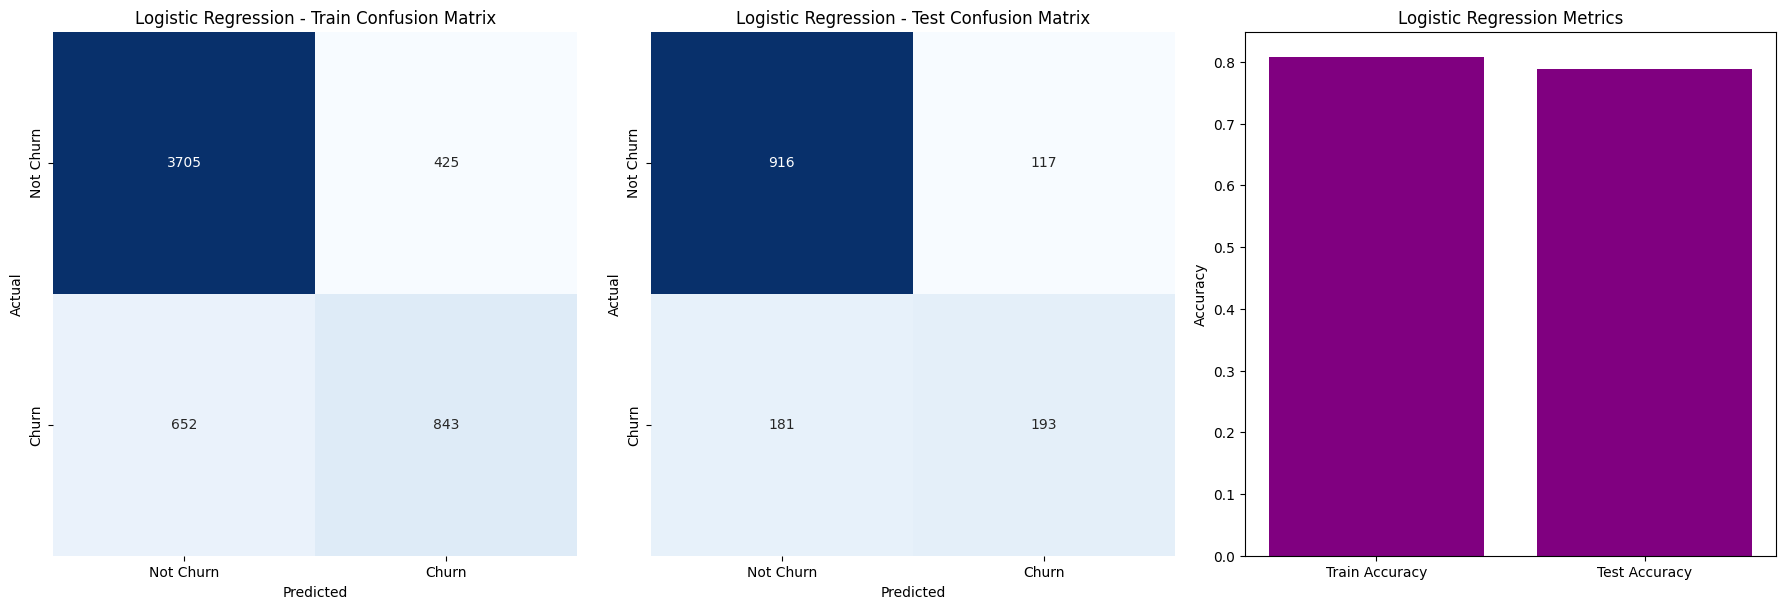

In [13]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_train = logistic_model.predict(X_train)
y_pred_test = logistic_model.predict(X_test)

# Confusion matrices
conf_matrix_train_logistic = confusion_matrix(y_train, y_pred_train)
conf_matrix_test_logistic = confusion_matrix(y_test, y_pred_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print metrics
print(f"Logistic Regression Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Extract coefficients and feature names
# Get feature names from the preprocessor
feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
feature_names = list(num_cols) + list(feature_names)

# Combine coefficients with feature names
coef_df = pd.DataFrame(logistic_model.coef_[0], index=feature_names, columns=['Coefficient'])
print("\nLogistic Regression Coefficients:")
print(coef_df)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion Matrix - Train
sns.heatmap(conf_matrix_train_logistic, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            cbar=False, square=True, xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Logistic Regression - Train Confusion Matrix')

# Confusion Matrix - Test
sns.heatmap(conf_matrix_test_logistic, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            cbar=False, square=True, xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Logistic Regression - Test Confusion Matrix')

# Metrics
axes[2].bar(['Train Accuracy', 'Test Accuracy'],
             [train_accuracy, test_accuracy], color=['purple', 'purple'])
axes[2].set_title('Logistic Regression Metrics')
axes[2].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

**Interpretation**

In contrast, the logistic regression model demonstrated better performance with a training accuracy of 80.85% and a test accuracy of 78.82%. This model showed better accuracy and provides coefficients that represent odds ratios, that help understand the influence of each feature on churn. Higher `tenure` reduces the odds of churning, while features like `InternetService_Fiber optic` increase the odds. The confusion matrices for logistic regression indicate a fairly good classification on both training and test sets.

### 2.4 Generalized Additive Model

GAM Metrics:
Train Accuracy: 0.8133
Test Accuracy: 0.7960


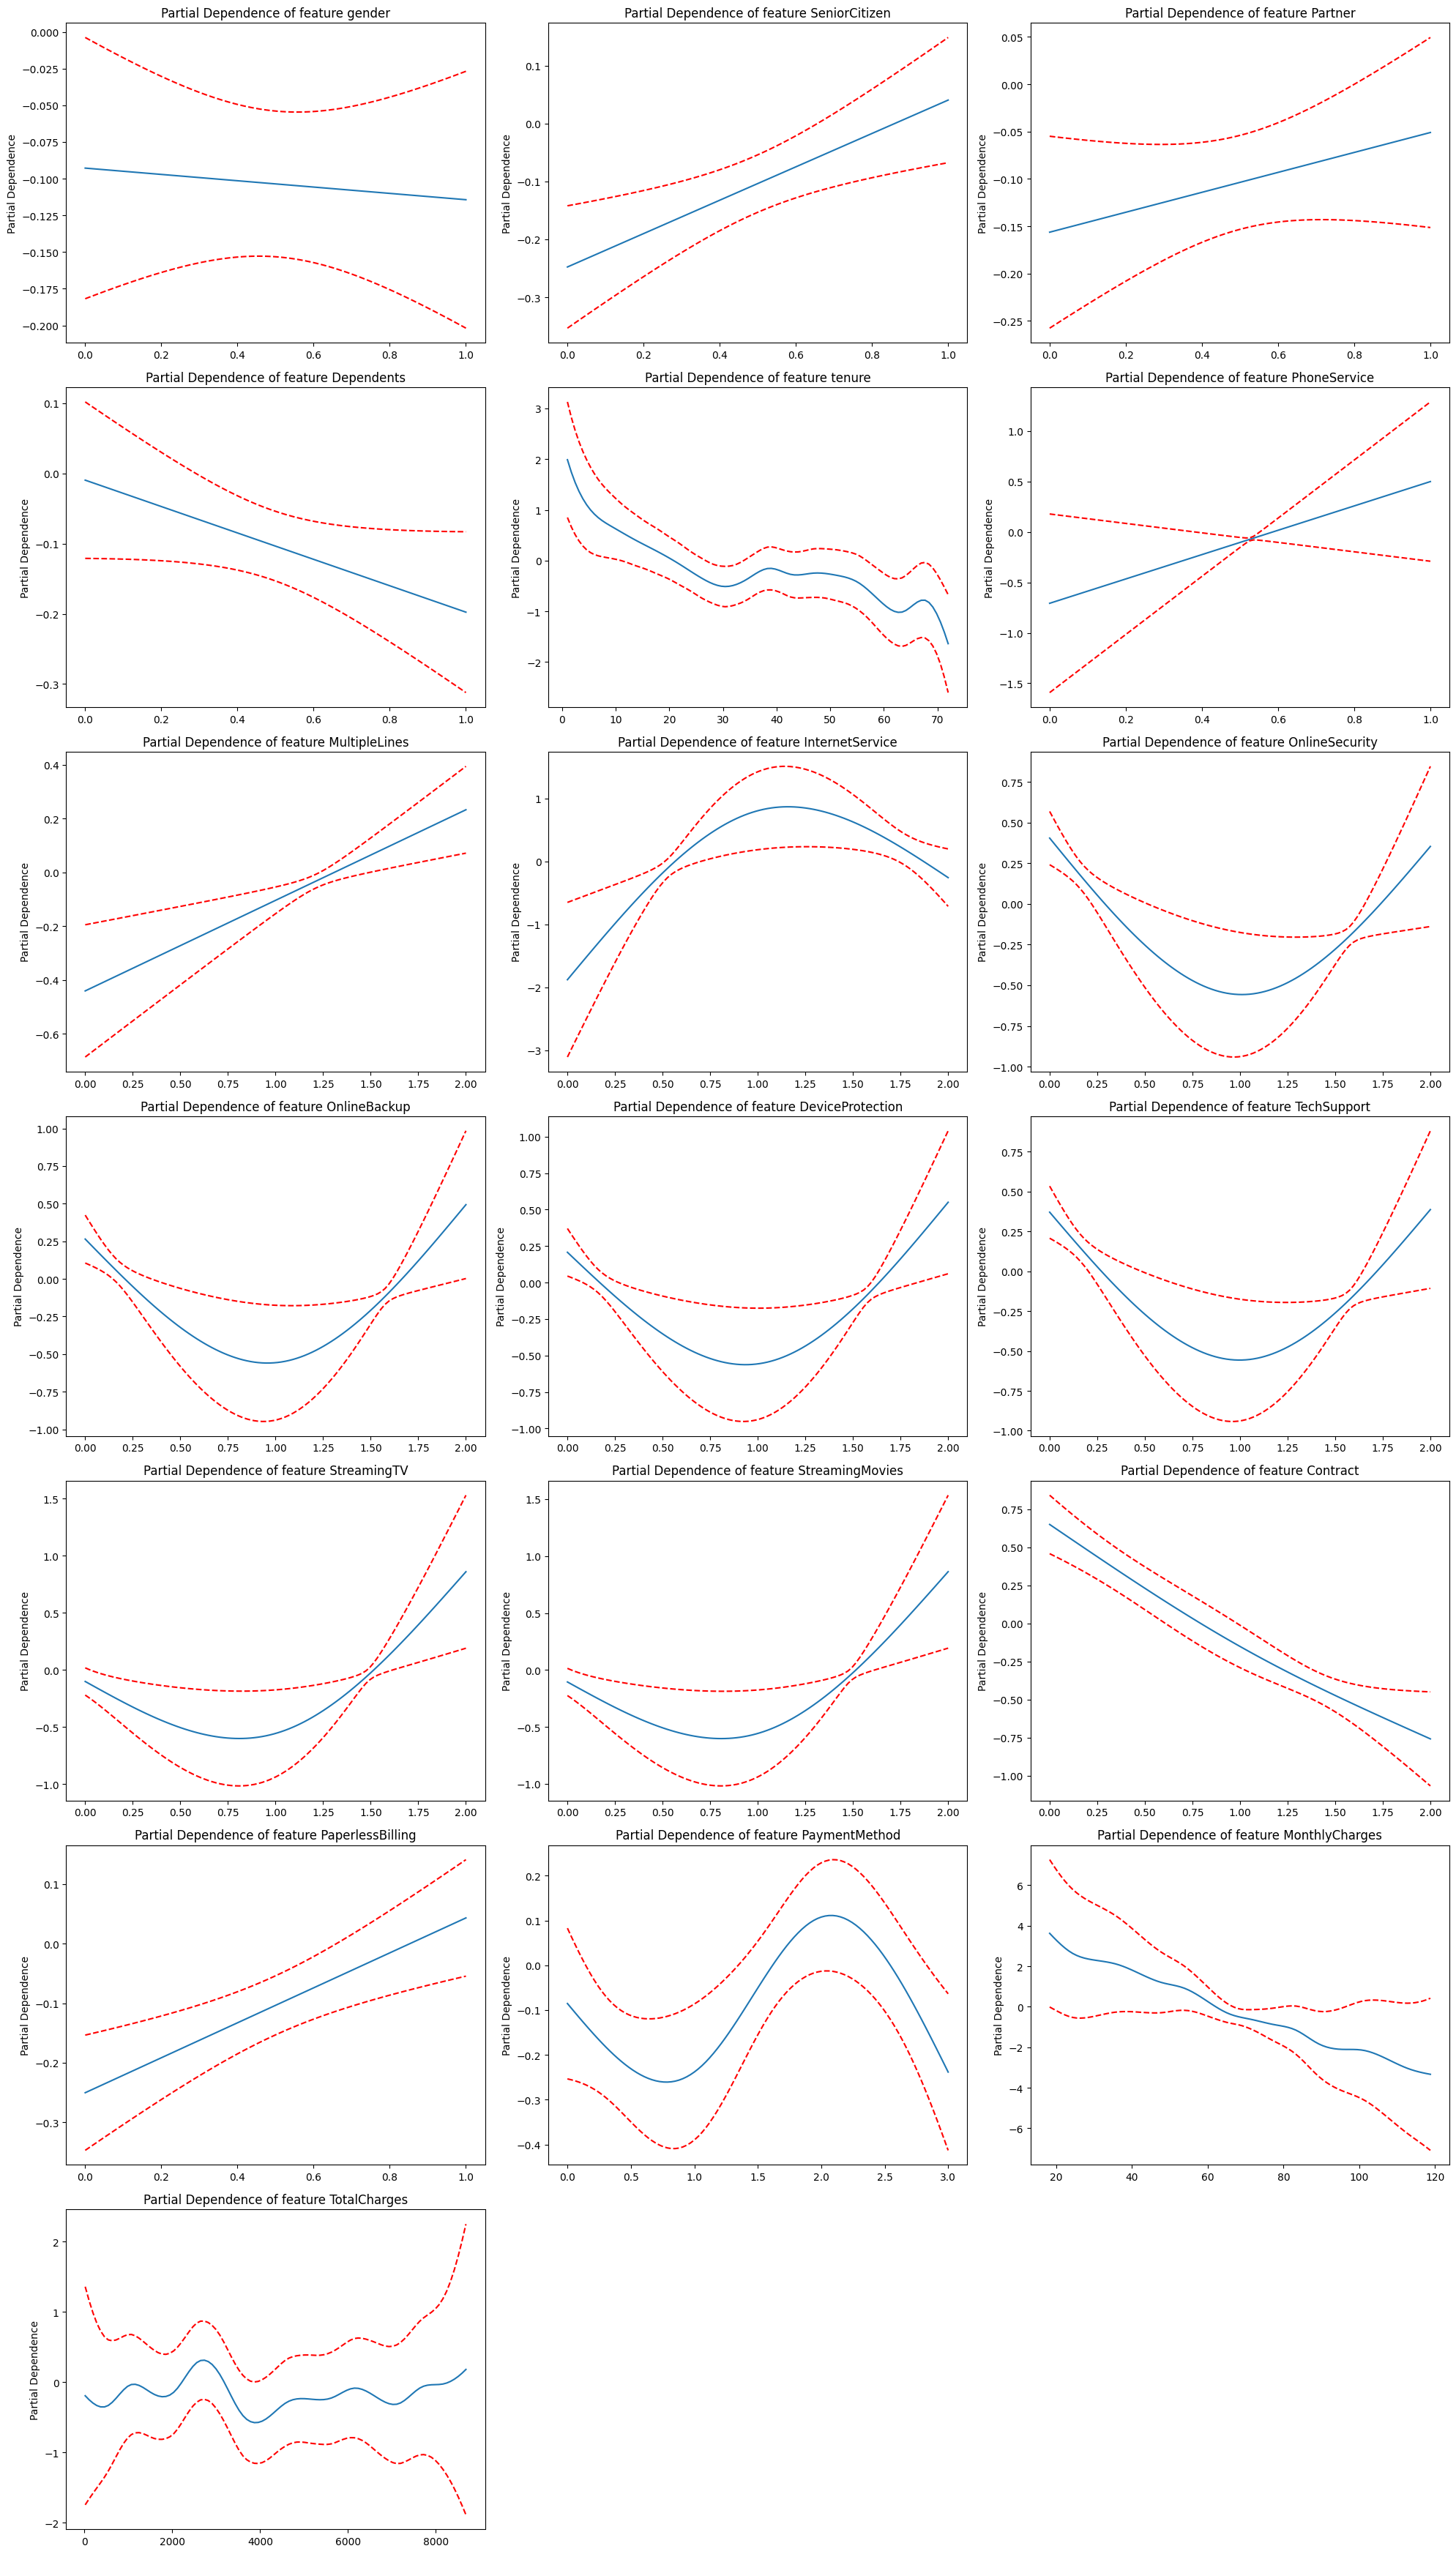

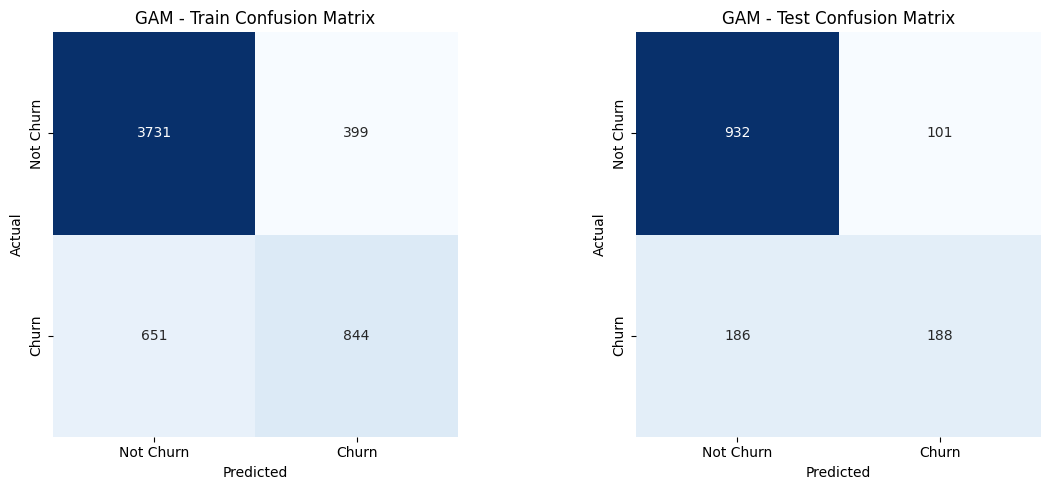


Feature Significance:
LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     56.3152
Link Function:                        LogitLink Log Likelihood:                                 -2238.8837
Number of Samples:                         5625 AIC:                                             4590.3979
                                                AICc:                                            4591.5987
                                                UBRE:                                               2.8241
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3126
Feature Functi

<ipython-input-29-dd5d66c0bf5d>:86: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [29]:
from pygam import LogisticGAM, s

# Prepare data for GAM
X_gam = X.copy()

# Apply Label Encoding to categorical columns
le = LabelEncoder()
for col in X_gam.select_dtypes(include=['object', 'category']).columns:
    X_gam[col] = le.fit_transform(X_gam[col])

# Convert to numpy array
X_gam = X_gam.to_numpy()

# Split the data
X_train_gam, X_test_gam, y_train_gam, y_test_gam = train_test_split(X_gam, y, test_size=0.2, random_state=42)

# Train GAM model
gam = LogisticGAM()
gam.fit(X_train_gam, y_train_gam)

# Predict and evaluate
y_pred_train_gam = gam.predict(X_train_gam)
y_pred_test_gam = gam.predict(X_test_gam)

# Confusion matrices
conf_matrix_train_gam = confusion_matrix(y_train_gam, y_pred_train_gam)
conf_matrix_test_gam = confusion_matrix(y_test_gam, y_pred_test_gam)

# Accuracy
train_accuracy_gam = accuracy_score(y_train_gam, y_pred_train_gam)
test_accuracy_gam = accuracy_score(y_test_gam, y_pred_test_gam)

# Print metrics
print(f"GAM Metrics:")
print(f"Train Accuracy: {train_accuracy_gam:.4f}")
print(f"Test Accuracy: {test_accuracy_gam:.4f}")

# Plot GAM partial dependence plots
n_features = len(gam.terms)
n_cols = 3
n_rows = (n_features - 1) // n_cols + 1

plt.figure(figsize=(20, 5 * n_rows))
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.subplot(n_rows, n_cols, i + 1)
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(f'Partial Dependence of feature {X.columns[term.feature]}')
    plt.ylabel('Partial Dependence')
plt.tight_layout()
plt.show()

# Plotting confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix - Train
sns.heatmap(conf_matrix_train_gam, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            cbar=False, square=True, xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('GAM - Train Confusion Matrix')

# Confusion Matrix - Test
sns.heatmap(conf_matrix_test_gam, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            cbar=False, square=True, xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('GAM - Test Confusion Matrix')

plt.tight_layout()
plt.show()

# Print feature significance
print("Feature Significance:")
print(gam.summary())

**Interpretation**

The GAM model outperformed the other models with a training accuracy of 81.33% and a test accuracy of 79.60%. By capturing non-linear relationships, GAM provided a better view of how each feature affects churn through partial dependence plots. These plots reveal complex patterns, such as the varying effects of `tenure` and `InternetService_Fiber optic` on churn probability. The GAM's ability to model non-linearities and deliver good predictions makes it particularly effective for this dataset. The confusion matrices and feature significance analysis further support GAM's better performance and interpretability.

---

## Model Comparisons & Recommendations

Linear regression, while providing a basic model, did not perform as well in capturing the complexities of churn prediction due to its linear nature. Logistic regression offers better accuracy and more interpretable results compared to linear regression, making it suitable for binary classification tasks. The GAM model stands out with its ability to handle non-linear relationships and slightly higher accuracy, making it the most effective model for understanding and predicting customer churn. Given its better performance and better insights into feature effects, GAM would be recommended for addressing the customer churn problem, though logistic regression remains a decent alternative for its simplicity and effectiveness.